In [ ]:
### Check which GPU is in use

!nvidia-smi

Fri Oct 30 05:51:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 48kB/s 


In [ ]:
### Check the version of tensorflow

import tensorflow as tf
tf.__version__

'2.3.1'

In [ ]:
### Import all the necessary libraries

from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
### Resizing all image path 

IMAGE_SIZE=[224,224]

### Read the data from the drive

train_path='/content/drive/My Drive/Datasets/train'
valid_path='/content/drive/My Drive/Datasets/valid'

In [ ]:
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/drive/My Drive/Datasets/train/*')

In [ ]:
folders

['/content/drive/My Drive/Datasets/train/Tomato___Target_Spot',
 '/content/drive/My Drive/Datasets/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/Datasets/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/My Drive/Datasets/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/Datasets/train/Tomato___Late_blight',
 '/content/drive/My Drive/Datasets/train/Tomato___healthy',
 '/content/drive/My Drive/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/Datasets/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/Datasets/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/Datasets/train/Tomato___Early_blight']

In [ ]:
x=Flatten()(inception.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

In [ ]:
model=Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/train',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 18343 images belonging to 10 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/valid',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
1147/1147 [==============================] - 247s 215ms/step - loss: 2.9184 - accuracy: 0.8686 - val_loss: 3.6301 - val_accuracy: 0.8515
Epoch 2/10
1147/1147 [==============================] - 243s 212ms/step - loss: 2.6017 - accuracy: 0.8811 - val_loss: 4.5359 - val_accuracy: 0.8347
Epoch 3/10
1147/1147 [==============================] - 243s 212ms/step - loss: 2.6871 - accuracy: 0.8843 - val_loss: 3.1325 - val_accuracy: 0.8711
Epoch 4/10
1147/1147 [==============================] - 243s 212ms/step - loss: 2.4565 - accuracy: 0.8942 - val_loss: 3.7126 - val_accuracy: 0.8622
Epoch 5/10
1147/1147 [==============================] - 243s 212ms/step - loss: 2.6009 - accuracy: 0.8914 - val_loss: 3.3783 - val_accuracy: 0.8755
Epoch 6/10
1147/1147 [==============================] - 243s 212ms/step - loss: 2.3401 - accuracy: 0.9002 - val_loss: 4.6081 - val_accuracy: 0.8519
Epoch 7/10
1147/1147 [==============================] - 243s 212ms/step - loss: 2.4434 - accuracy: 0.9007 - val_

In [ ]:
import matplotlib.pyplot as plt

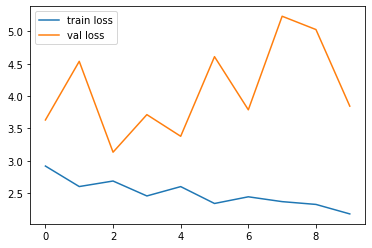

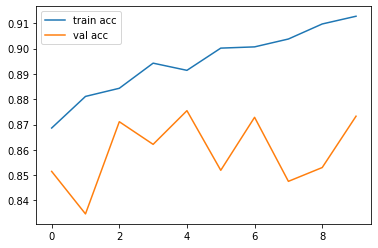

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.7001326e-01, 6.3992700e-33, 0.0000000e+00, ..., 6.7759631e-33,
        0.0000000e+00, 1.4292971e-08],
       [0.0000000e+00, 0.0000000e+00, 2.2286327e-29, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4252256e-01,
        8.5747749e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 8, 2, ..., 8, 7, 2])